In [133]:
import numpy as np
import pandas as pd
import time

class simple_qlearning(object):
    
    @staticmethod
    def initialize_q(state_num, action_num):
        
        q_table = np.zeros(shape=(state_num, action_num))
        # q_table = np.random.rand(state_num, action_num)
        return q_table    

    def __init__(self, state_num, action_num, seed, 
                 epoch_num=10, r=10, lr=0.1, dr=0.8, 
                 greedy=0.9, time_fresh=0.1, if_save=False):
        
        np.random.seed(seed)
        self.state_num = state_num
        self.action_num = action_num
        self.epoch_num = epoch_num
        self.greedy = greedy
        self.q_table = self.initialize_q(state_num, action_num)
        
        self.r = r
        self.lr = lr
        self.dr = dr
        self.time_fresh = time_fresh
        self.if_save = if_save
        self.rst_dict = {}

    def take_action(self, state_idx):
        
        random_num = np.random.rand()
        probs = self.q_table[state_idx]
        if random_num > self.greedy or probs.all() == 0:
            action = np.random.choice(range(self.action_num))
        else:
            action = np.argmax(probs)
            
        # print(random_num>self.greedy, probs, action)
        return action
    
    def init_env(self):
        self.env = ["O"] + ["_"] * (self.state_num-2) + ["T"]
    
    def update_env(self, current_pos, action):
        
        if action == 1:
            next_pos = current_pos + 1
            self.env[current_pos] = "_"
            if self.env[next_pos] != "T":
                self.env[next_pos] = "O"
        else:
            
            if current_pos == 0:
                next_pos = current_pos + 1
            else:
                next_pos = current_pos - 1
                
            self.env[current_pos] = "_"
            self.env[next_pos] = "O"
            
        print("\r"+"".join(self.env), end="")
        time.sleep(self.time_fresh)
                
    def update_q(self, current_pos, next_pos, action, r):
        
        update_val = max(self.q_table[next_pos]) * self.dr - self.q_table[current_pos][action] + r
        self.q_table[current_pos][action] += self.lr * update_val
        # print(update_val, self.q_table)
    
    def learn(self):
        
        for epoch in range(self.epoch_num):
            step = 0
            current_pos = 0
            rst = [['O', '_', '_', '_', '_', 'T']]
            self.init_env()
            
            while True:
                
                if current_pos == 0:
                    next_pos, action = 1, 1 
                else:
                    action = self.take_action(current_pos)
                    if action:
                        next_pos = current_pos + action
                    else:
                        next_pos = current_pos - 1


                if self.env[next_pos] == "T":
                    self.update_q(current_pos, next_pos, action, self.r)
                    self.update_env(current_pos, action)
                    print(f"\r\n Epoch: {epoch}, use step {step}....")
                    break
                else:
                    self.update_q(current_pos, next_pos, action, r=0)
                    self.update_env(current_pos, action)      
                    current_pos = next_pos
                    step += 1
                
                # print(self.env, rst)
                rst.append(self.env.copy())
            
            if self.if_save:
                rst.append(['_', '_', '_', '_', '_', 'O'])          
                self.rst_dict[epoch] = rst
                
            

In [134]:
state_num, action_num = 6, 2

ql = simple_qlearning(state_num, action_num, r=10, seed=2020, time_fresh=0.3, if_save=True)
ql.learn()

_____T
 Epoch: 0, use step 18....
_____T
 Epoch: 1, use step 24....
_____T
 Epoch: 2, use step 10....
_____T
 Epoch: 3, use step 10....
_____T
 Epoch: 4, use step 4....
_____T
 Epoch: 5, use step 6....
_____T
 Epoch: 6, use step 4....
_____T
 Epoch: 7, use step 4....
_____T
 Epoch: 8, use step 4....
_____T
 Epoch: 9, use step 4....


In [135]:
rst = ql.rst_dict

In [136]:
rst

{0: [['O', '_', '_', '_', '_', 'T'],
  ['_', 'O', '_', '_', '_', 'T'],
  ['_', '_', 'O', '_', '_', 'T'],
  ['_', '_', '_', 'O', '_', 'T'],
  ['_', '_', '_', '_', 'O', 'T'],
  ['_', '_', '_', 'O', '_', 'T'],
  ['_', '_', 'O', '_', '_', 'T'],
  ['_', '_', '_', 'O', '_', 'T'],
  ['_', '_', 'O', '_', '_', 'T'],
  ['_', '_', '_', 'O', '_', 'T'],
  ['_', '_', 'O', '_', '_', 'T'],
  ['_', 'O', '_', '_', '_', 'T'],
  ['_', '_', 'O', '_', '_', 'T'],
  ['_', '_', '_', 'O', '_', 'T'],
  ['_', '_', '_', '_', 'O', 'T'],
  ['_', '_', '_', 'O', '_', 'T'],
  ['_', '_', '_', '_', 'O', 'T'],
  ['_', '_', '_', 'O', '_', 'T'],
  ['_', '_', '_', '_', 'O', 'T'],
  ['_', '_', '_', '_', '_', 'O']],
 1: [['O', '_', '_', '_', '_', 'T'],
  ['_', 'O', '_', '_', '_', 'T'],
  ['O', '_', '_', '_', '_', 'T'],
  ['_', 'O', '_', '_', '_', 'T'],
  ['O', '_', '_', '_', '_', 'T'],
  ['_', 'O', '_', '_', '_', 'T'],
  ['O', '_', '_', '_', '_', 'T'],
  ['_', 'O', '_', '_', '_', 'T'],
  ['_', '_', 'O', '_', '_', 'T'],
  ['_',

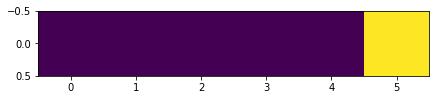

In [143]:
import matplotlib.pyplot as plt
import matplotlib.animation as animation

mapper = {"_":0, "O":2, "T":1}

data_gen = (x for x in rst[0])
# for i in rst[0]:
#     d = [mapper[x] for x in i]
def init():
    plots.append(ax.imshow([[2, 0, 0, 0, 0, 1]]))
    return plots

def run(data):
    plots[0].set_data([[mapper[x] for x in data]])
    return plots

plots = []
fig, ax = plt.subplots(1, 1, figsize=(7,4))
# plots.append(ax.imshow([]))

ani = animation.FuncAnimation(fig, run, data_gen, init_func=init, interval=500, repeat=False, blit=False, save_count=500)

ani.save("./regression.gif", writer='pillow')


In [144]:
data_gen = (x for x in rst[0])

for i in data_gen:
    print(i)

['O', '_', '_', '_', '_', 'T']
['_', 'O', '_', '_', '_', 'T']
['_', '_', 'O', '_', '_', 'T']
['_', '_', '_', 'O', '_', 'T']
['_', '_', '_', '_', 'O', 'T']
['_', '_', '_', 'O', '_', 'T']
['_', '_', 'O', '_', '_', 'T']
['_', '_', '_', 'O', '_', 'T']
['_', '_', 'O', '_', '_', 'T']
['_', '_', '_', 'O', '_', 'T']
['_', '_', 'O', '_', '_', 'T']
['_', 'O', '_', '_', '_', 'T']
['_', '_', 'O', '_', '_', 'T']
['_', '_', '_', 'O', '_', 'T']
['_', '_', '_', '_', 'O', 'T']
['_', '_', '_', 'O', '_', 'T']
['_', '_', '_', '_', 'O', 'T']
['_', '_', '_', 'O', '_', 'T']
['_', '_', '_', '_', 'O', 'T']
['_', '_', '_', '_', '_', 'O']


TypeError: Image data of dtype object cannot be converted to float

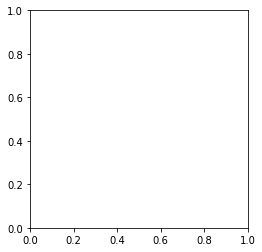

In [62]:
plt.imshow()